Инициализация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import sklearn

Загружаем данные:

In [2]:
dataset_urls = {
    "60s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-60s.csv",
    "70s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-70s.csv",
    "80s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-80s.csv",
    "90s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-90s.csv",
    "00s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-00s.csv",
    "10s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-10s.csv"
};

Выберем год

In [3]:
dataurl = dataset_urls["10s"]; #10
dataraw = pd.read_csv(dataurl);

Размеры таблицы:

In [4]:
dataraw.shape

(6398, 19)

Отобразим первые строки:

In [5]:
dataraw.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Признаки:
* Track - название композиции
* Artist - исполнитель
* Uri - ссылка на композицию в Spotify
* Danceability - численная оценка от 0 до 1 описывает, насколько композияция подходит для танцев.
* Energy - численная оценка, которая описывает общую эмоциональную активность и энергичность музыкальной композиции. 
* Key - величина, которая описывает общую тональность музыкальной композиции, где 0 = Ля, 1 = Ля минор, 2 = Си бемоль и т.д., иначе, если тональность не определена = -1.
* Loudness - величина, описывающая громкость музыкальной копозиции в dB.
* Mode - признак, который определяет модальность: мажор - 1, а минор - 0.
* Speechiness - численная оценка от 0 до 1, которая описывает преобладание речи в музыкальной композиции. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают дорожки, которые могут содержать как музыку, так и речь, как по частям, так и по слоям, включая такие случаи, как рэп. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь.
* Acousticness - численная оценка от 0 до 1, которая описывает вероятность чисто аккустического исполнения музыкальной композиции.
* Instrumentalness - численная оценка от 0 до 1, которая описывает вероятность отсутствия вокала в данной композиции. Чем выше оценка, тем ниже вероятность наличия вокала.
* Liveness - численная оценка от 0 до 1, которая описывает вероятность записи музыкальной композиции вживую. Оценка выше 0.8 означает высокую вероятность исполнения вживую.
* Valence - численное оценка от 0 до 1, которая описывает общий положительный эмоциональный настрой композиции от наиболее негативных и грустных - 0, к наиболее счастливым и радостным - 1.
* Tempo - величина, описывающая темп музыкальной композиции, количество ударов в минуту (BPM).
* Duration - величина, описывающая продолжительность музыкальной композиции в миллисекундах.
* Time signature - величина, описывающая количество ударов в каждом такте.
* Chorus hit - временная отметка, когда начинается третья секция музыкальной композиции (?)
* Sections - величина, описывающая количество секций в музыкальной композиции (?). 
* Target - признак, который принимает значение "1", если музыкальная композиция стала хитом, и "0" иначе.

Имена признаков в датасете:

In [6]:
dataraw.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

Выберем композиции, которые стали хитами и наоборот:

In [7]:
nohitposes = [index for index in range(0,dataraw.shape[0]) if dataraw.at[index, 'target']==0]
nohitlist = dataraw.loc[nohitposes, :]

hitposes = [index for index in range(0,dataraw.shape[0]) if dataraw.at[index, 'target']==1]
hitlist = dataraw.loc[hitposes, :]
hitlist.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0,0.1080,0.274,172.065,205463,4,44.89147,9,1
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.0,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0,0.4090,0.737,165.084,214320,4,32.17301,12,1
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0,0.1080,0.369,97.547,200387,4,60.21027,10,1


Выберем характеритиски, для которых можно построить гистограмму:

In [8]:
signs = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'];

Выведем гистаграммы признаков хитов:

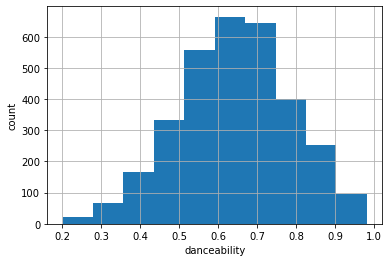

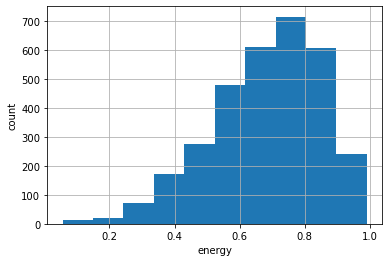

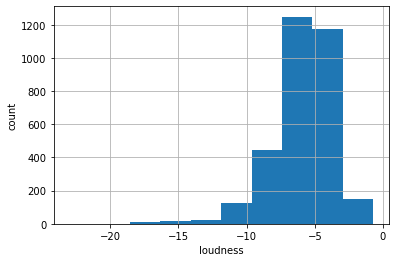

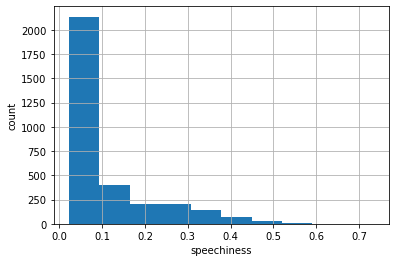

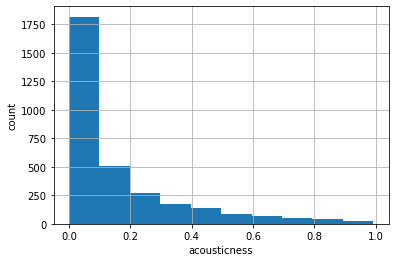

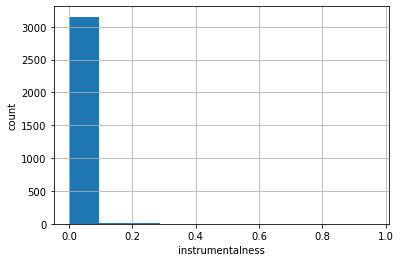

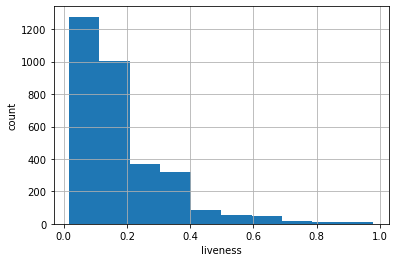

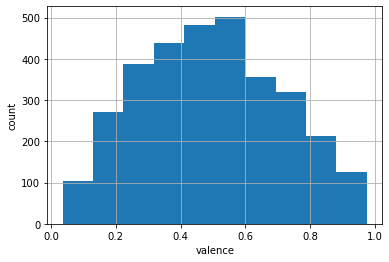

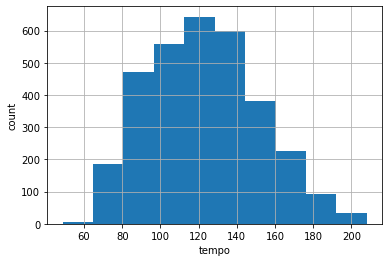

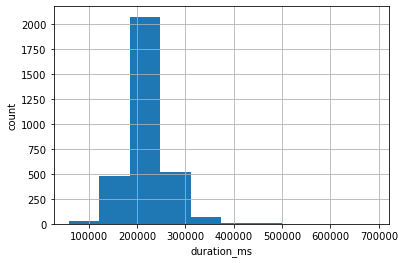

In [9]:
for sign in signs:
    data = hitlist.copy();
    data[sign].hist()
    plt.xlabel(sign)
    plt.ylabel("count")
    plt.show()


Выведем ящик с усами признаков хитов:

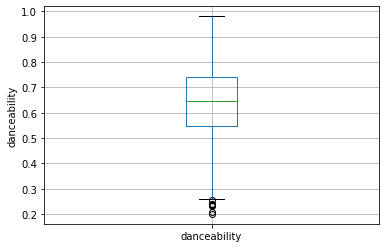

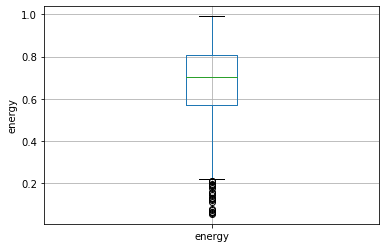

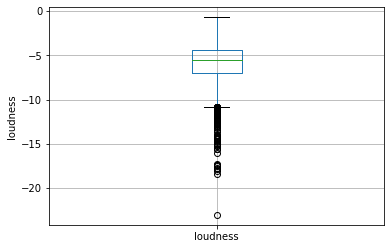

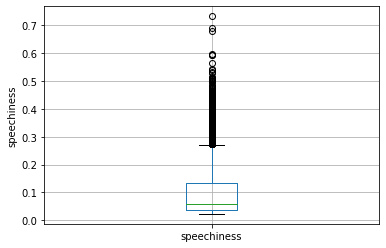

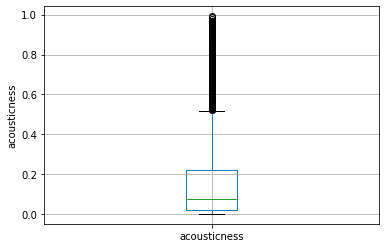

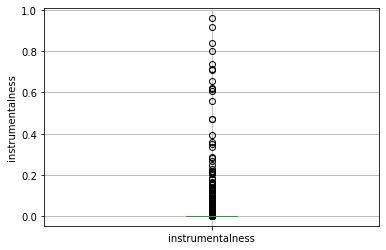

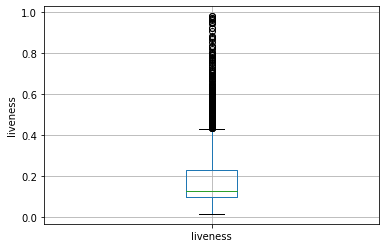

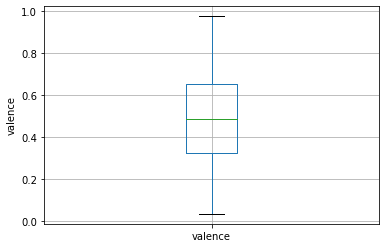

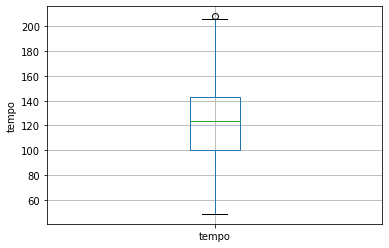

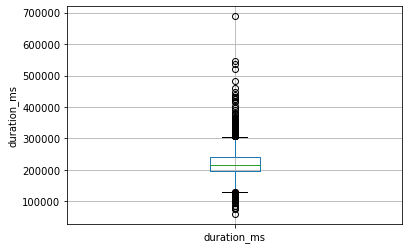

In [10]:
for sign in signs:
    data = hitlist.copy();
    data.boxplot(column=sign)
    plt.ylabel(sign)
    plt.show()

Обычно, что ниже 1 и выше 3 квартиля считается выбросами, поэтому попробуем избавиться от них:

In [11]:
rows_to_drop = hitlist[
    (hitlist['duration_ms'] < hitlist['duration_ms'].quantile(0.005)) |
    (hitlist['duration_ms'] > hitlist['duration_ms'].quantile(0.955)) | 
    (hitlist['tempo'] > hitlist['tempo'].quantile(0.955)) |
    (hitlist['danceability'] < hitlist['danceability'].quantile(0.005)) |
    (hitlist['energy'] < hitlist['energy'].quantile(0.005))

].index

cropped_hitlist = hitlist.drop(rows_to_drop)

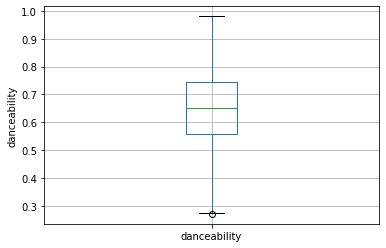

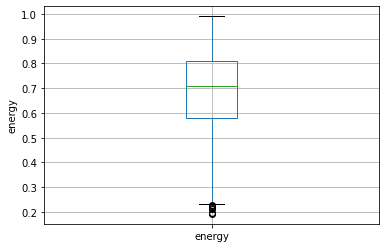

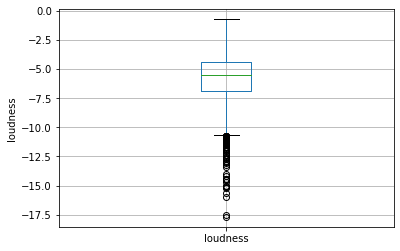

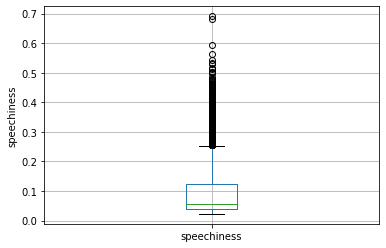

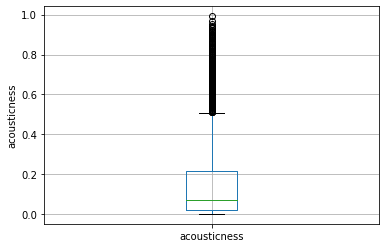

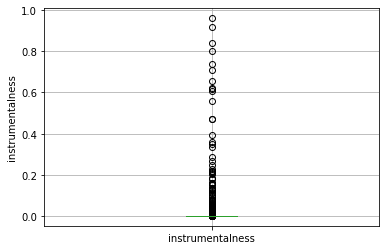

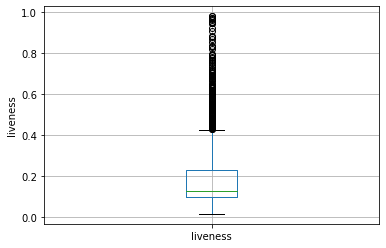

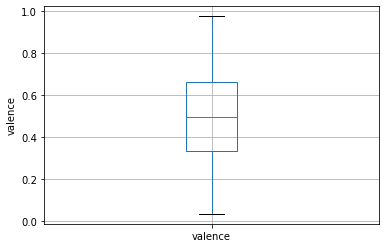

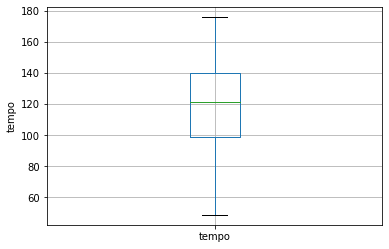

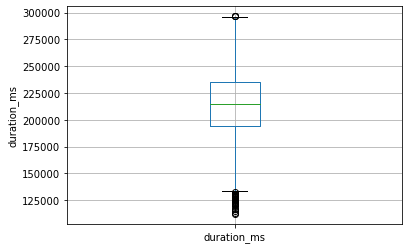

In [12]:
for sign in signs:
    data = cropped_hitlist.copy();
    data.boxplot(column=sign)
    plt.ylabel(sign)
    plt.show()

Сравним диаграммы рассеивания для признаков danceability и speechiness у скорректированных хитов:

No handles with labels found to put in legend.


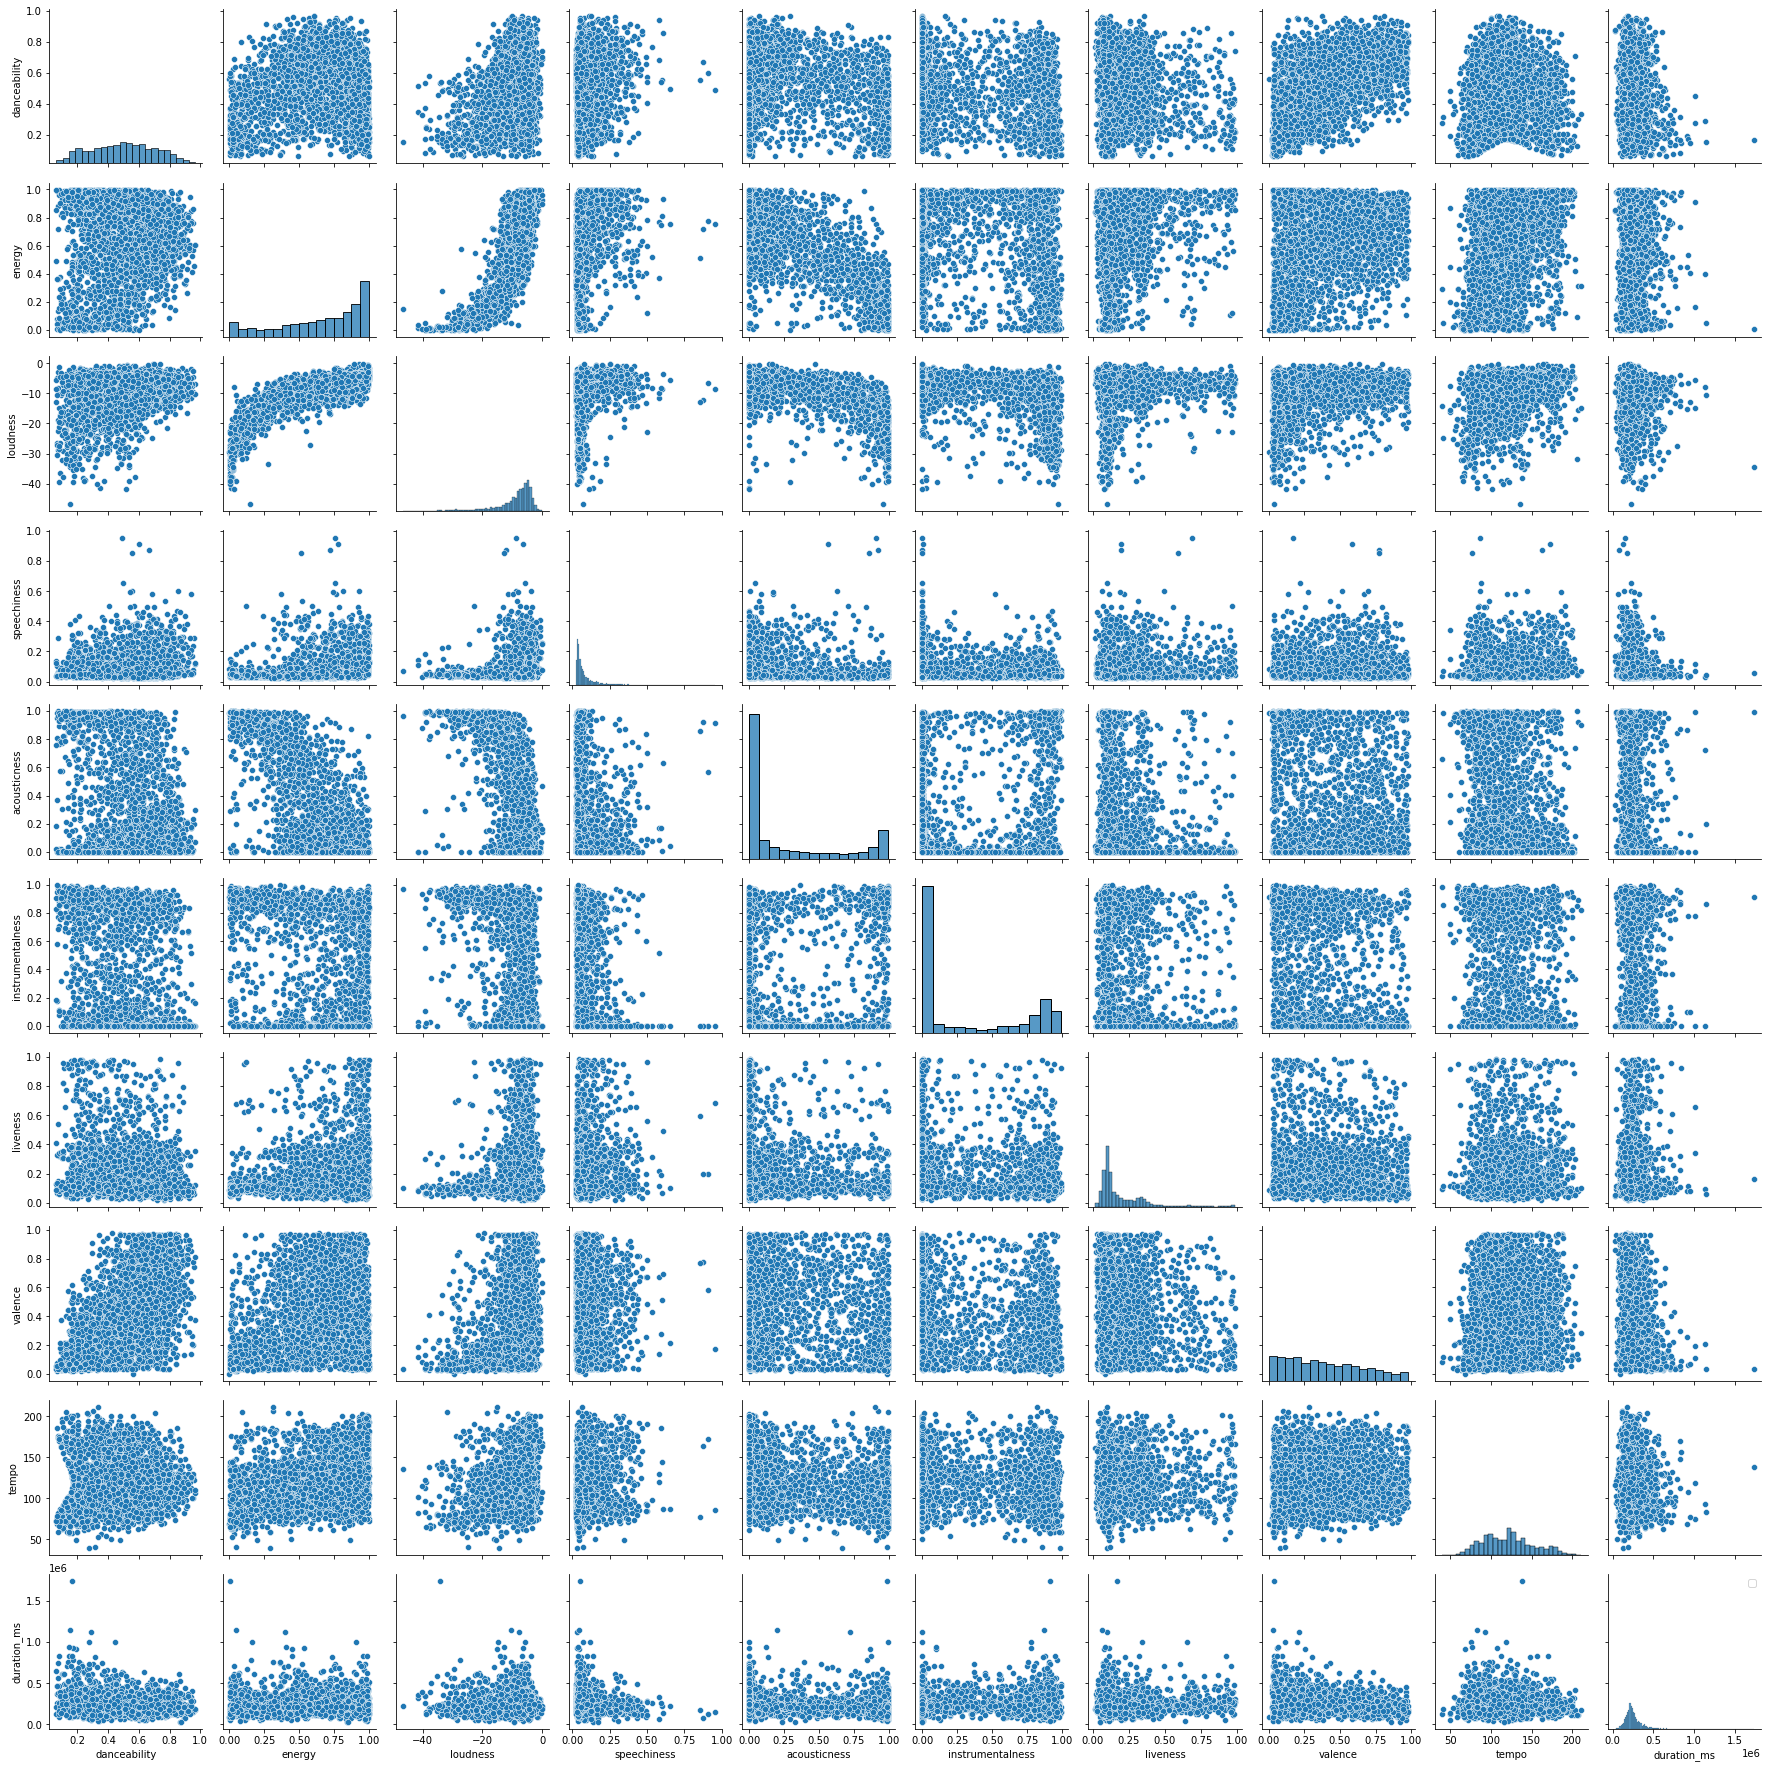

In [24]:
sns.pairplot(nohitlist, vars=signs, diag_kind='hist')
plt.legend()
pass